<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/AditGhatU5Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

For this project, I'm looking at the relationship between the poverty rates of counties in the United States and the percentage of voters who supported Bill Clinton in the 1992 election at the county level. The goal is to see how the economic conditions of different countries might have influenced voter behavior, and to better understand political preferences during that time. Doing some preliminary research on Bill Clinton and his oponent, George H.W. Bush, I can make a fairly solid guess that Clinton was more popular among low-income voters. However, this is only accounting for population, and not the number of counties as we talk about here. This means that all the people in NYC still count as one county, which explains some of the trends later in the graphs.

In [ ]:
#downloads the data from my github
voters = pd.read_csv('https://raw.githubusercontent.com/AdityaGhatty/Datascience/refs/heads/main/ClintonVoters%20-%20Sheet1.csv')

In [ ]:
voters

,County,Clinton voter %,Median age,Mean Savings($),PerCapita Income,Poverty %,Veteran %,Female %,Pop. Density,Nursing Home %,Crime Index (Per capita)
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
...,...,...,...,...,...,...,...,...,...,...,...
2699,"Sheridan, WY",35.81,36.3,87232,22250,11.6,16.59,50.73,9.5,4.67,275
2700,"Sublette, WY",20.83,35.4,83020,18748,7.9,12.18,47.98,1.0,8.60,432
2701,"Sweetwater, WY",43.09,30.4,104346,19086,7.7,14.64,49.42,3.9,3.00,625
2702,"Washakie, WY",28.08,34.6,114176,17608,11.7,14.47,49.65,3.8,8.47,313


For this project, I just want to analyze the poverty rate of a county to predict clinton's voter percentage. I'll go ahead and remove all other columns in a new dataset, although I might want to look at other variables later.


In [ ]:
from types import new_class
voters.columns
#Index(['County', 'Clinton voter %', 'Median age', 'Mean Savings($)',
       #'PerCapita Income', 'Poverty %', 'Veteran %', 'Female %',
       #'Pop. Density', 'Nursing Home %', 'Crime Index (Per capita)'])
       #sns.scatterplot(data=votersavings, x='Mean Savings($)', y='Clinton voter %')
voterPoverty = voters[['Clinton voter %', 'Poverty %']] #creates new dataset voterPoverty
voterPoverty

,Clinton voter %,Poverty %
0,30.92,15.2
1,26.24,13.6
2,46.36,25.0
3,32.92,15.0
4,67.67,33.0
...,...,...
2699,35.81,11.6
2700,20.83,7.9
2701,43.09,7.7
2702,28.08,11.7


<Axes: xlabel='Poverty %', ylabel='Clinton voter %'>

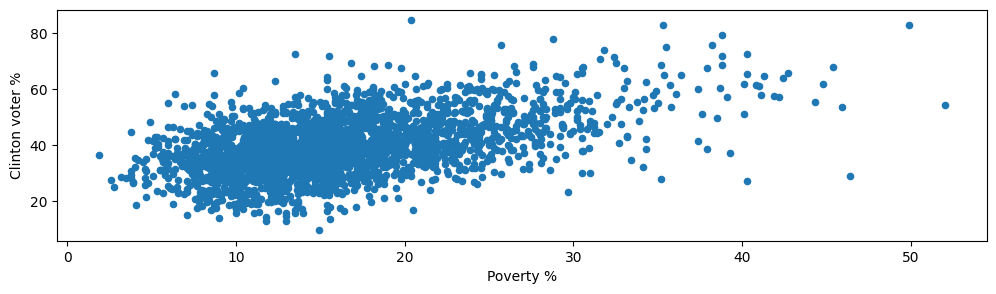

In [ ]:
#sns.scatterplot(data=voterPoverty, x='Poverty %', y='Clinton voter %')
voterPoverty.plot(x="Poverty %", y="Clinton voter %", figsize=(12, 3), kind="scatter")

Theres definitely some positive correlation here, and it looks pretty strong to me. As I mentioned before, the dots aren't indicative of populations, and also remember that not everyone voted in the election, and even then there were more than 2 candidates, meaning Clinton could have been popular in counties with a less than 50% voting percentage. Clinton won with 43% of the votes, compared to 37% from bush and the rest (about 19%) largely from Ross Perot.

**LINEAR MODEL**

In [ ]:
x = voterPoverty['Poverty %']
y = voterPoverty['Clinton voter %']

with pm.Model() as model:
  alpha = pm.Normal("alpha", sigma=10)
  beta = pm.Normal("beta", sigma=10)
  mu = pm.Deterministic("mu", alpha+beta*x)
  sigma = pm.HalfCauchy("sigma", 10)

  # Likelihood
  likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=y)

    # Sample from the posterior
  trace = pm.sample()
pm.sample_posterior_predictive(
    trace, model, extend_inferencedata=True
)

Output()

Output()

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

Text(0, 0.5, 'Clinton voter %')

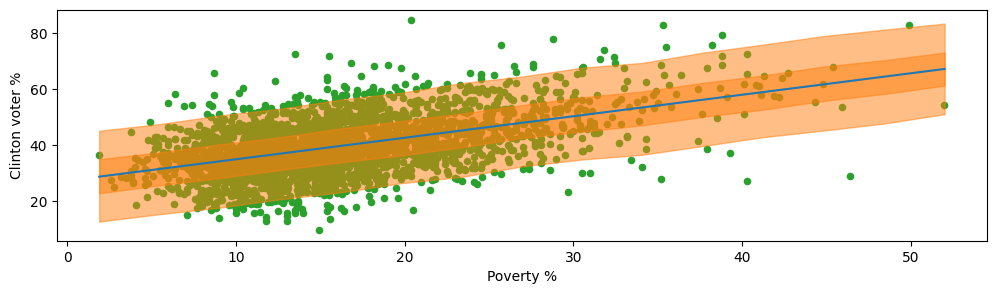

In [ ]:
mean_line = trace.posterior["mu"].mean(("chain", "draw"))
xs = np.random.normal(voterPoverty['Poverty %'].values, 0.01)
idx = np.argsort(xs)
x = np.linspace(xs.min(), xs.max(), 15)  # Generate 15 points for x

y_pred_q = trace.posterior_predictive["likelihood"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)

y_hat_bounds = iter(
    [
        PchipInterpolator(xs[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

# Plot raw data using the DataFrame plot function
_, ax = plt.subplots(figsize=(12, 3))
voterPoverty.plot(x="Poverty %", y="Clinton voter %", kind="scatter", color="C2", ax=ax, zorder=-3)

# Plot the mean line
ax.plot(xs[idx], mean_line[idx], c="C0")

# Plot confidence intervals
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

ax.set_xlabel("Poverty %")
ax.set_ylabel("Clinton voter %")


This shows a pretty solid correlation. I think the weirdness I'm sensing is from the fact that there aren't many data points with a poverty % above 30, so the line obviously gets thinner in that region, although I'm sure this is a pretty strong predictor otherwise. I'll check the posterior now to see how accurate we are.

<Axes: xlabel='likelihood'>

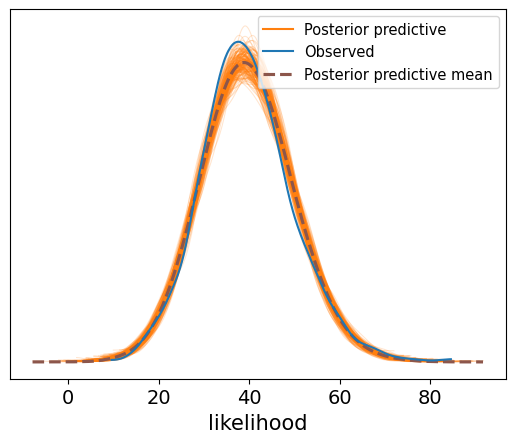

In [ ]:
az.plot_ppc(trace, num_pp_samples=200, colors=["C1", "C0", "C5"])

This is actually pretty accurate, and suggests a strong relationship between the poverty rates of counties and the percentage of voters who supported Clinton in the 1992 election (at the county level).  The fit implies that the poverty rate was a significant predictor of Clinton's voter share in these counties.